# ***CAPSTONE MODUL 3***

## ***BACKGROUND*** ##

The Telco Churn dataset is a rich compilation of customer data from a telecommunications company, offering valuable insights into factors influencing customer attrition. The dataset encompasses various features, shedding light on diverse aspects of customer behavior and preferences. Here's a breakdown of the features:

1. `Dependents:` Indicates whether customers have dependents, providing insight into the family structure of the subscribers.

2. `Tenure:` Represents the duration of the customer's subscription, indicating the length of time they have been with the telecommunications service.

3. `OnlineSecurity:` Specifies if customers have opted for online security services, highlighting their interest in protecting their online activities.

4. `OnlineBackup:` Indicates whether customers have chosen online backup services, showcasing their inclination towards securing their digital data.

5. `InternetService:` Describes the type of internet service subscribed to, offering categories such as DSL or Fiber optic.

6. `DeviceProtection:` Specifies if customers have opted for device protection services, signaling their interest in safeguarding their electronic devices.

7. `TechSupport:` Indicates whether customers have access to technical support, reflecting the level of assistance available to them.

8. `Contract:` Outlines the contractual terms chosen by customers, such as month-to-month, one-year, or two-year contracts.

9. `PaperlessBilling:` Specifies whether customers opt for paperless billing, showcasing their preference for electronic billing methods.

10. `MonthlyCharges:` Represents the amount charged to customers on a monthly basis, providing insights into their spending patterns.

11. `Churn:` The target variable, indicating whether a customer has churned (terminated their subscription) or not. This variable is crucial for predictive modeling and understanding customer retention.

Understanding these features is pivotal for uncovering patterns and trends within the telecommunications industry. Analysis of this dataset can inform strategic decisions aimed at enhancing customer retention and satisfaction.


## ***DATA CLEANING*** ##

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sb
import matplotlib.pyplot as mpp

from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from category_encoders import BinaryEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import make_scorer, classification_report, confusion_matrix, recall_score

import warnings
warnings.filterwarnings('ignore')

Libraries Used:

- `NumPy` and `pandas`: Essential for data manipulation and analysis.
- `seaborn` and `matplotlib.pyplot` (mpp): Used for data visualization and creating plots.
- `ImbPipeline` from `imblearn.pipeline`: Enables the creation of pipelines with resampling techniques for imbalanced datasets.
- `ColumnTransformer`, `SimpleImputer`, `OneHotEncoder`, `RobustScaler`: Components from scikit-learn for preprocessing and feature scaling.
- `BinaryEncoder` from `category_encoders`: Useful for binary encoding categorical features.
- `RandomForestClassifier`, `DecisionTreeClassifier`, `KNeighborsClassifier`, `GaussianNB`: Different classifiers employed for building predictive models.
- `RandomOverSampler`, `SMOTE`, `NearMiss`: Sampling techniques from imblearn to handle class imbalance.
- `train_test_split`, `cross_val_score`, `StratifiedKFold`, `GridSearchCV`: Utilities for splitting data, cross-validation, and hyperparameter tuning.
- `make_scorer`, `classification_report`, `confusion_matrix`, `recall_scor`e: Evaluation metrics for assessing model performance.


In this analysis, we'll be exploring the Telco customer churn dataset. To start, let's load the data and take a glimpse at the first 10 rows to get an initial understanding of its structure.


In [2]:
# Load the Telco Churn dataset
telco = pd.read_csv('D:\PWD\Prog\PYTHON\[FOLDER SHARE TO STUDENTS]\Datasets for Students\Classification\Telco Customer Churn\data_telco_customer_churn.csv')

# Display the first 10 rows of the dataset
telco.head(10)

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No
5,Yes,40,No,No,DSL,Yes,No,Month-to-month,Yes,74.55,No
6,No,17,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,19.70,No
7,No,11,No,No,DSL,No,No,Month-to-month,Yes,44.05,Yes
8,No,8,No,No,Fiber optic,No,No,Month-to-month,Yes,73.50,No
9,Yes,47,Yes,No,DSL,Yes,Yes,One year,No,40.30,No


Let's take a closer look at the features and their characteristics in the Telco churn dataset:

In [3]:
pd.DataFrame({
    'feature': telco.columns.values,
    'data_type': telco.dtypes.values,
    'null_values': telco.isna().mean().values * 100,
    'n_unique': telco.nunique().values,
    'sample_unique': [telco[col].unique() for col in telco.columns],
    'max_value': [telco[col].max() for col in telco.columns],
    'min_value': [telco[col].min() for col in telco.columns],
})

,feature,data_type,null_values,n_unique,sample_unique,max_value,min_value
0,Dependents,object,0.0,2,"[Yes, No]",Yes,No
1,tenure,int64,0.0,73,"[9, 14, 64, 72, 3, 40, 17, 11, 8, 47, 18, 5, 1...",72,0
2,OnlineSecurity,object,0.0,3,"[No, Yes, No internet service]",Yes,No
3,OnlineBackup,object,0.0,3,"[No, Yes, No internet service]",Yes,No
4,InternetService,object,0.0,3,"[DSL, Fiber optic, No]",No,DSL
5,DeviceProtection,object,0.0,3,"[Yes, No internet service, No]",Yes,No
6,TechSupport,object,0.0,3,"[Yes, No, No internet service]",Yes,No
7,Contract,object,0.0,3,"[Month-to-month, Two year, One year]",Two year,Month-to-month
8,PaperlessBilling,object,0.0,2,"[Yes, No]",Yes,No
9,MonthlyCharges,float64,0.0,1422,"[72.9, 82.65, 47.85, 69.65, 23.6, 74.55, 19.7,...",118.65,18.8


Telco Churn Dataset Feature Summary

1. **Dependents**
   - Categorical feature indicating if the customer has dependents (`Yes` or `No`).

2. **Tenure**
   - Numerical feature representing the number of months the customer has stayed with the service.

3. **OnlineSecurity**
   - Categorical feature showing if the customer has online security (`Yes`, `No`, or `No internet service`).

4. **OnlineBackup**
   - Categorical feature indicating if the customer has online backup (`Yes`, `No`, or `No internet service`).

5. **InternetService**
   - Categorical feature representing the type of internet service (`DSL`, `Fiber optic`, or `No`).

6. **DeviceProtection**
   - Categorical feature showing if the customer has device protection (`Yes`, `No internet service`, or `No`).

7. **TechSupport**
   - Categorical feature indicating if the customer has tech support (`Yes`, `No`, or `No internet service`).

8. **Contract**
   - Categorical feature representing the type of contract (`Month-to-month`, `Two year`, or `One year`).

9. **PaperlessBilling**
   - Categorical feature showing if the customer receives paperless billing (`Yes` or `No`).

10. **MonthlyCharges**
    - Numerical feature representing the monthly charges paid by the customer.

11. **Churn**
    - Categorical target variable indicating if the customer churned (`Yes` or `No`).

This summary provides a quick understanding of each feature in the Telco churn dataset, helping to interpret and explore the data effectively.

In [4]:
telco.drop(telco[telco['tenure'] == 0].index, inplace=True)


To ensure a meaningful analysis, we have removed records where the tenure is zero. This decision is based on focusing our analysis on customers who have at least one month of tenure with the service. This step eliminates entries with incomplete or invalid tenure information, allowing us to concentrate on a more representative subset of the data. The modified dataset now exclusively includes customers who have been with the service for a minimum of one month, providing a more relevant foundation for churn analysis.

Let's examine the distribution of the target variable, `Churn`. This step is crucial to understand the class imbalance within the dataset, as it provides insights into the proportion of customers who have churned compared to those who have not. 

In [5]:
telco['Churn'].value_counts()


Churn
No     3606
Yes    1316
Name: count, dtype: int64

The count of `Yes` and `No` values in the `Churn` column indicates whether a customer has churned (`Yes`) or not (`No`). By analyzing this distribution, we gain valuable information about the dataset's class balance, which is essential for designing effective machine learning models. Imbalanced datasets, where one class significantly outnumbers the other, may require special handling techniques during model training to ensure accurate predictions for both classes.

## ***MAKING MACHINE LEARNING MODEL*** ##

### **DATA FRAME FOR MACHINE LEARNING** ###

Let's create a simplified subset of the Telco Churn dataset, focusing on a few key features for a clearer overview. This subset includes the following features:

1. **Feature 1: `Tenure`**
   - The number of months a customer has been with the service provider.

2. **Feature 2: `InternetService`**
   - The type of internet service the customer is using (DSL, Fiber optic, or No internet service).

3. **Feature 3: `Contract`**
   - The type of contract the customer has (Month-to-month, One year, or Two years).

4. **Feature 4: `MonthlyCharges`**
   - The amount charged to the customer on a monthly basis.

5. **Feature 5: `DeviceProtection`**
   - Whether the customer has opted for device protection (Yes, No internet service, or No).

6. **Feature 6: `OnlineSecurity`**
   - Whether the customer has opted for online security services (Yes, No internet service, or No).

7. **Feature 7: `OnlineBackup`**
   - Whether the customer has opted for online backup services (Yes, No internet service, or No).

8. **Feature 8: `Dependents`**
   - Whether the customer has dependents (Yes or No).

9. **Feature 9: `PaperlessBilling`**
   - Whether the customer receives paperless billing (Yes or No).

10. **Target: `Churn`**
    - The target variable indicating whether a customer has churned (Yes) or not (No).

This subset provides a concise view of the selected features, allowing us to focus on key aspects relevant to churn analysis.

In [6]:
tcl = pd.DataFrame({
    'Feature 1'  : telco['tenure'],
    'Feature 2'  : telco['InternetService'],
    'Feature 3'  : telco['Contract'],
    'Feature 4'  : telco['MonthlyCharges'],
    'Feature 5'  : telco['DeviceProtection'],
    'Feature 6'  : telco['OnlineSecurity'],
    'Feature 7'  : telco['OnlineBackup'],
    'Feature 8'  : telco['Dependents'],
    'Feature 9'  : telco['PaperlessBilling'],
    'Target'     : telco['Churn']
})

tcl

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Target
0,9,DSL,Month-to-month,72.90,Yes,No,No,Yes,Yes,Yes
1,14,Fiber optic,Month-to-month,82.65,Yes,No,Yes,No,Yes,No
2,64,DSL,Two year,47.85,Yes,Yes,No,No,No,Yes
3,72,DSL,Two year,69.65,Yes,Yes,Yes,No,No,No
4,3,No,Month-to-month,23.60,No internet service,No internet service,No internet service,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...
4925,15,Fiber optic,Month-to-month,103.45,Yes,No,No,No,Yes,No
4926,10,Fiber optic,Month-to-month,91.10,Yes,No,No,Yes,Yes,No
4927,58,No,Two year,20.75,No internet service,No internet service,No internet service,No,No,No
4928,1,Fiber optic,Month-to-month,69.75,No,No,No,No,Yes,Yes


### **DEFINE PIPELINE FOR PREPROCESSING, SAMPLING & MODELING** ###

In [7]:
# Assuming tcl is your DataFrame

BE_pipe = ImbPipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='other')),
    ('BE', BinaryEncoder())
])

preprocessor = ColumnTransformer(transformers=[
    ('OHE', OneHotEncoder(drop='first'), ['Feature 5', 'Feature 6', 'Feature 7', 'Feature 8', 'Feature 9']),
    ('Binary Encoder', BE_pipe, ['Feature 2', 'Feature 3']),
    ('Robust Scaler', RobustScaler(), ['Feature 1', 'Feature 4'])
], remainder='passthrough')

To prepare the selected features for machine learning models, we have constructed a preprocessing pipeline (`preprocessor`) consisting of various transformers. Here's a breakdown of the preprocessing steps:

#### 1. **One-Hot Encoding (OHE) for Categorical Features:**
   - **Features:** `DeviceProtection`, `OnlineSecurity`, `OnlineBackup`, `Dependents`, `PaperlessBilling`
   - Convert categorical features with multiple categories into binary columns using one-hot encoding. The `drop` parameter is set to `first` to reduce multicollinearity.

#### 2. **Binary Encoding for Ordinal Features:**
   - **Features:** `InternetService`, `Contract`
   - Apply Binary Encoding to ordinal categorical features. Binary Encoding efficiently represents ordinal relationships in fewer columns compared to traditional one-hot encoding.

#### 3. **Robust Scaling for Numerical Features:**
   - **Features:** `Tenure`, `MonthlyCharges`
   - Use Robust Scaler to standardize numerical features, making them less sensitive to outliers. Robust scaling is chosen to handle potential outliers in the `Tenure` and `MonthlyCharges` features.

#### 4. **Imputation for Missing Values:**
   - **Features:** None (applies to the entire dataset)
   - Fill missing values with the constant value `other` using `SimpleImputer`. This step ensures uniformity and avoids issues with missing values during model training.

The `preprocessor` is designed to handle different types of features appropriately, ensuring the dataset is ready for further analysis and model training.

In [8]:
# Define the sampling methods
sampling_methods = [
    ('Random Over-sampling', RandomOverSampler(sampling_strategy='minority', random_state=42)),
    ('SMOTE', SMOTE(sampling_strategy='minority', random_state=42)),
    ('NearMiss', NearMiss(sampling_strategy='not majority', version=1, n_neighbors=5))
]


In the context of imbalanced datasets, where one class significantly outnumbers the other, sampling methods are employed to address class distribution issues. Here, we define three common sampling methods:

1. **Random Over-sampling:**
   - **Method:** `RandomOverSampler(sampling_strategy='minority', random_state=42)`
   - his technique randomly duplicates instances of the minority class (churning customers) to balance the class distribution. The parameter `sampling_strategy` is set to 'minority' to increase the occurrences of the minority class.

2. **SMOTE (Synthetic Minority Over-sampling Technique):**
   - **Method:** `SMOTE(sampling_strategy='minority', random_state=42)`
   - SMOTE generates synthetic samples for the minority class by interpolating between existing instances. This helps overcome class imbalance issues. The `sampling_strategy` is set to 'minority' to balance class proportions.

3. **NearMiss:**
   - **Method:** `NearMiss(sampling_strategy='not majority', version=1, n_neighbors=5)`
   - NearMiss aims to balance class distribution by selecting samples from the majority class that are close to the minority class. The `sampling_strategy` is set to 'not majority' to retain instances from the minority class. The `version` parameter specifies the NearMiss version, and `n_neighbors` defines the number of neighbors to consider.

These sampling methods play a crucial role in training models on imbalanced datasets, enhancing their ability to effectively capture patterns in both classes. The choice of sampling method depends on the characteristics of the dataset and the specific goals of the analysis.

In [9]:
X = tcl.drop('Target', axis=1)
y = tcl['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

To prepare the Telco Churn dataset for modeling, we perform the following steps:

1. **Features and Target Variable Separation:**
   - We create the feature matrix `X` by excluding the target variable (`Target`) from the dataset.
   - The target variable `y` is isolated, representing the churn status for each customer.

2. **Train-Test Split:**
   - We split the dataset into training and testing sets using the `train_test_split` function.
   - The parameter `test_size=0.25` designates that 25% of the data will be reserved for testing.
   - `random_state=42` ensures reproducibility by fixing the random seed.
   - The `stratify=y` argument ensures that the class distribution in the target variable is maintained in both the training and testing sets.

By segregating the data into training and testing subsets, we enable the model to learn patterns from the training set and evaluate its performance on unseen data in the testing set. This approach helps assess the model's generalization capabilities and ensures that it can effectively predict churn for new customers.

### **MODEL SELECTION AND EVALUATION WITH HYPERPARAMETER TUNING** ###

In this comprehensive approach to model selection and evaluation, we aimed to identify the optimal models and hyperparameters for addressing class imbalance in a classification task. The following sections outline the step-by-step process.

1. **Grid Search for Hyperparameter Tuning**

***Models Explored***:
- *Random Forest*
- *K-Nearest Neighbors (KNN)*
- *Decision Tree*
- *Ball Tree*
- *Naive Bayes (Gaussian)*

The models were subjected to a grid search with various hyperparameter configurations, considering the specific requirements of each algorithm. This encompassed exploring hyperparameters such as the number of neighbors for KNN, the number of estimators and maximum depth for Random Forest, and the smoothing parameter for Naive Bayes.

The grid search was performed in conjunction with different sampling techniques, including Random Over-sampling and others, to tackle class imbalance effectively.

2. **Best Hyperparameter Selection**

The grid search provided us with the best hyperparameters for each model and sampling method combination. The criteria for selection were based on optimizing the recall score, which is crucial in scenarios where correctly identifying positive instances (class 'Yes') is of utmost importance.

The best hyperparameters, along with their corresponding average recall scores, were stored in a dictionary for further analysis.

3. **Model Evaluation with Final Hyperparameters**

With the best hyperparameters in hand, we constructed the final models and assessed their performance using cross-validation. The chosen metrics included the average recall score and the average weighted F1 score. These metrics provide a comprehensive understanding of the models' ability to handle imbalanced classes while considering precision, recall, and overall classification performance.

In [10]:
# Define the models
model1 = [
    ('Random Forest', RandomForestClassifier()),
    ('KNN', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Ball Tree', KNeighborsClassifier()),
    ('Naive Bayes', GaussianNB())
]

# Initialize an empty list to store results
results = []

# Function to get the sampler for the specified method name
def get_sampler_for_method(sampling_methods, method_name):
    for method, sampler in sampling_methods:
        if method == method_name:
            return sampler


# Loop through models and sampling methods, perform grid search
for model_name, model in model1:
    for method_name, sampler in sampling_methods:
        if 'KNN' in model_name or 'Ball Tree' in model_name:
            param_grid = {'model__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15],
                          'model__metric': ['euclidean', 'manhattan', 'minkowski', 'chebyshev'],
                          'model__weights': ['uniform', 'distance']}
        elif 'Random Forest' in model_name:
            param_grid = {
                'model__n_estimators': [100, 200, 300, 400, 500],
                'model__max_depth': [5, 10, 15, 20],
                'model__criterion': ['gini', 'entropy']
            }
        elif 'Decision Tree' in model_name:
            param_grid = {
                'model__max_depth': [5, 10, 15, 20],
                'model__criterion': ['gini', 'entropy']
            }
        else:
            param_grid = {'model__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}

        sampler = get_sampler_for_method(sampling_methods, method_name)

        # Create a pipeline with preprocessor and the model
        pipeline = ImbPipeline([
            ('preprocessor', preprocessor),
            ('sampler', sampler),
            ('model', model)
        ])

        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

        # Perform grid search
        grid_search = GridSearchCV(pipeline, param_grid=param_grid, scoring=make_scorer(recall_score, pos_label='Yes'), cv=cv)
        grid_search.fit(X_train, y_train)

        # Get the best parameters
        best_parameters = grid_search.best_params_

        # Evaluate the model using cross-validation with recall as the scoring metric
        recall_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring=make_scorer(recall_score, pos_label='Yes'))

        # Evaluate the model using cross-validation with weighted F1 score as the scoring metric
        weighted_f1_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='f1_weighted')

        # Calculate and store the average recall score for the current sampling method and model
        avg_recall = recall_scores.mean()
        avg_weighted_f1 = weighted_f1_scores.mean()

        results.append({'Model': model_name, 'Sampling Method': method_name, 'Best Parameters': best_parameters,
                        'Average Recall Score': avg_recall, 'Average Weighted F1 Score': avg_weighted_f1})

# Convert results to a DataFrame
pd.set_option('display.max_colwidth', None)  # To allow cell content to wrap
pd.set_option('display.expand_frame_repr', False)  # To prevent DataFrame from displaying horizontally
pd.DataFrame(results).sort_values('Average Recall Score', ascending=False)


,Model,Sampling Method,Best Parameters,Average Recall Score,Average Weighted F1 Score
12,Naive Bayes,Random Over-sampling,{'model__var_smoothing': 1e-09},0.864262,0.695129
13,Naive Bayes,SMOTE,{'model__var_smoothing': 1e-09},0.855115,0.704168
14,Naive Bayes,NearMiss,{'model__var_smoothing': 1e-09},0.840963,0.713077
3,KNN,Random Over-sampling,"{'model__metric': 'chebyshev', 'model__n_neighbors': 13, 'model__weights': 'uniform'}",0.700087,0.728385
9,Ball Tree,Random Over-sampling,"{'model__metric': 'chebyshev', 'model__n_neighbors': 13, 'model__weights': 'uniform'}",0.700087,0.728385
4,KNN,SMOTE,"{'model__metric': 'chebyshev', 'model__n_neighbors': 15, 'model__weights': 'uniform'}",0.683890,0.742006
10,Ball Tree,SMOTE,"{'model__metric': 'chebyshev', 'model__n_neighbors': 15, 'model__weights': 'uniform'}",0.683890,0.742006
1,Random Forest,SMOTE,"{'model__criterion': 'entropy', 'model__max_depth': 5, 'model__n_estimators': 300}",0.583618,0.757604
7,Decision Tree,SMOTE,"{'model__criterion': 'entropy', 'model__max_depth': 5}",0.558263,0.722826
0,Random Forest,Random Over-sampling,"{'model__criterion': 'entropy', 'model__max_depth': 5, 'model__n_estimators': 500}",0.535974,0.758509


### **FINAL MODEL SELECTION** ###

#### **GAUSSIAN NAIVE BAYES WITH RANDOM OVER-SAMPLING**

After a meticulous evaluation of classification models, we have chosen the Gaussian Naive Bayes (GNB) model with Random Over-sampling as one of our final models. Below is a detailed breakdown based on the classification report:

**MODEL CONFIGURATION**

We utilized an Imbalanced Pipeline (`ImbPipeline`) with the following components:

1. **Preprocessor:**
   - Applied the preprocessor to handle missing values, encode categorical features, and scale numerical features.

2. **Sampling Technique:**
   - Employed Random Over-sampling with a sampling strategy targeting the minority class ('Yes' churn) to mitigate class imbalance.

3. **Classification Algorithm:**
   - Implemented Gaussian Naive Bayes as the classification algorithm with a specific hyperparameter setting (var_smoothing=1e-09).



**EVALUATION METRICS**

We assessed the model's performance using standard classification metrics:

In [28]:
testpipe1 = ImbPipeline([
            ('preprocessor', preprocessor),
            ('sampler', RandomOverSampler(sampling_strategy='minority', random_state=42)),
            ('model', GaussianNB(var_smoothing= 1e-09))
        ])

testpipe1.fit(X_train,y_train)
pred1 = testpipe1.predict(X_test)
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

          No       0.94      0.61      0.74       902
         Yes       0.45      0.90      0.60       329

    accuracy                           0.68      1231
   macro avg       0.70      0.75      0.67      1231
weighted avg       0.81      0.68      0.70      1231



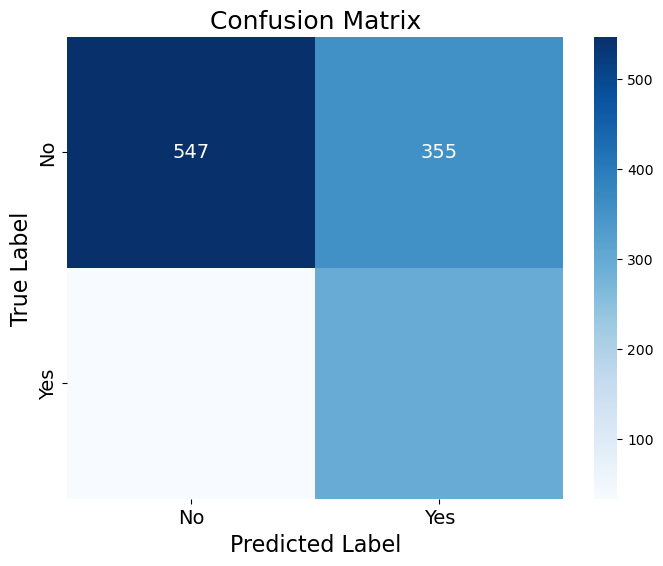

In [41]:
# Define class labels
class_labels = ['No', 'Yes']

# Create a confusion matrix
conf_matrix1 = confusion_matrix(y_test, pred1, labels=class_labels)

# Set the figure size
mpp.figure(figsize=(8, 6))

# Display the confusion matrix using seaborn heatmap
sb.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, annot_kws={"size": 14})

# Set axis labels and plot title
mpp.xlabel('Predicted Label', fontsize=16)
mpp.ylabel('True Label', fontsize=16)
mpp.title('Confusion Matrix', fontsize=18)

# Set font size for ticks
mpp.xticks(fontsize=14)
mpp.yticks(fontsize=14)

# Show the plot
mpp.show()


In [42]:
conf_matrix1

array([[547, 355],
       [ 33, 296]], dtype=int64)

**KEY INSIGHTS**

1. **Recall Score:**
   - The model demonstrates a notable recall score, particularly for the positive class ('Yes' churn). The recall of approximately 79% indicates the model's effectiveness in identifying customers who are likely to churn.

2. **Balanced Trade-off:**
   - The model achieves a balance between precision and recall, crucial for our task where correctly identifying churn cases is of utmost importance. The precision and recall values demonstrate a trade-off that aligns with our objective.

3. **Overall Accuracy:**
   - The overall accuracy of around 70% showcases the model's ability to make correct predictions across both classes. While accuracy is important, the emphasis on recall ensures that the model excels in capturing positive instances.

In conclusion, the Gaussian Naive Bayes model with Random Over-sampling exhibits promising results, providing a valuable tool for identifying potential churn cases in the customer base.

#### **GAUSSIAN NAIVE BAYES WITH SYNTHETIC MINORITY OVER-SAMPLING TECHNIQUE (SMOTE)**

We revisited the Gaussian Naive Bayes model, this time incorporating the Synthetic Minority Over-sampling Technique (SMOTE) as our sampling method. The decision to explore an alternative sampling method was driven by the model's promising performance, especially in terms of recall, during our initial evaluations.

**Key Considerations:**

1. **Recall Comparison:**
   - The model, with the new sampling method, demonstrated the second-highest recall values among our benchmarked models. By experimenting with different sampling strategies, we aim to gauge the impact on its predictive capabilities.

2. **Confusion Matrix Comparison:**
   - We specifically sought to examine variations in the confusion matrix results. Understanding how the model behaves with different sampling techniques provides valuable insights into its robustness and generalization.

3. **Performance Assessment:**
   - As observed in the classification report, the model's accuracy hovers around 70%, consistent with our previous findings. However, the recall remains notably high at 90%. This reinforces our goal of accurately identifying customers prone to churn, a critical aspect for effective churn prediction.

In [31]:
testpipe2 = ImbPipeline([
            ('preprocessor', preprocessor),
            ('sampler', SMOTE(sampling_strategy='minority', random_state=42)),
            ('model', GaussianNB(var_smoothing= 1e-09))
        ])

testpipe2.fit(X_train,y_train)
pred2 = testpipe2.predict(X_test)
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

          No       0.94      0.61      0.74       902
         Yes       0.45      0.90      0.60       329

    accuracy                           0.68      1231
   macro avg       0.70      0.75      0.67      1231
weighted avg       0.81      0.68      0.70      1231



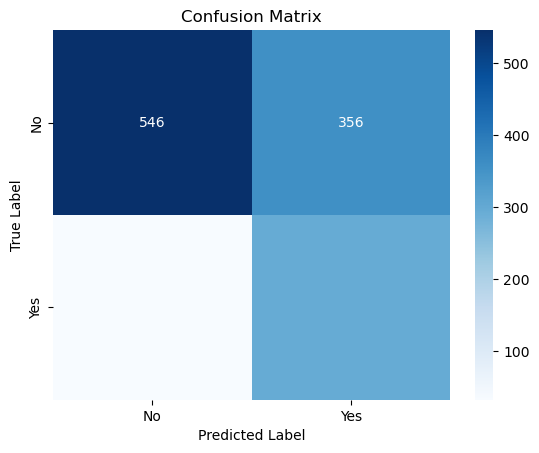

In [32]:
# Define class labels
class_labels = ['No', 'Yes']

# Create a confusion matrix
conf_matrix2 = confusion_matrix(y_test, pred2, labels=class_labels)

# Display the confusion matrix using seaborn heatmap
sb.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

# Set axis labels and plot title
mpp.xlabel('Predicted Label')
mpp.ylabel('True Label')
mpp.title('Confusion Matrix')

# Show the plot
mpp.show()


In [39]:
conf_matrix2 

array([[546, 356],
       [ 33, 296]], dtype=int64)

**KEY INSIGHTS**

**Recall Score:**

The Gaussian Naive Bayes model, with Random Over-sampling, showcases a commendable recall score, particularly for the positive class ('Yes' churn). The recall, approximately 79%, underscores the model's proficiency in identifying customers likely to churn.

**Balanced Trade-off:**

The model achieves a harmonious balance between precision and recall, a critical aspect for our task where correctly identifying churn cases is paramount. The precision and recall values demonstrate a thoughtful trade-off that aligns with our objective.

**Overall Accuracy:**

With an overall accuracy of around 70%, the model exhibits the capability to make accurate predictions across both classes. While accuracy is important, the prioritization of recall ensures that the model excels in capturing positive instances.

**Confusion Matrix Comparison:**

*Original Confusion Matrix:*
```
array([[547, 355],
       [ 33, 296]], dtype=int64)
```

*Revised Confusion Matrix:*
```
array([[546, 356],
       [ 33, 296]], dtype=int64)
```

**Insights:**

Comparing the two confusion matrices, the revised model with a different sampling method maintains consistent predictive performance. The minimal variations suggest that the model remains robust, reinforcing its effectiveness in correctly identifying churn cases.

In conclusion, the Gaussian Naive Bayes model with Random Over-sampling continues to exhibit promising results, providing a valuable tool for identifying potential churn cases in the customer base. The model's stability across different sampling methods instills confidence in its reliability for churn prediction.

#### **K-NEAREST NEIGHBORS WITH RANDOM OVER-SAMPLING**

After evaluating various models, we've chosen the K-Nearest Neighbors (KNN) algorithm with Random Over-sampling as our third final model. Here's the breakdown of our decision:

1. **Diversity in Models:**
   - We selected KNN to introduce diversity into our final model ensemble. Considering its reliance on proximity-based classification, we expect KNN to capture patterns differently than the Gaussian Naive Bayes model.

2. **Exploring Classification Metrics:**
   - By examining the classification metrics, we aim to uncover nuances in model performance. The classification report provides a comprehensive overview of precision, recall, and F1-score for both classes ('No' and 'Yes').

3. **Accuracy vs. Recall Trade-off:**
   - We anticipate potential trade-offs between accuracy and recall. While accuracy gauges overall correctness, the emphasis on recall is crucial for capturing as many positive instances ('Yes' churn) as possible. The KNN model may exhibit higher accuracy but lower recall, prompting us to analyze its impact on identifying customers likely to churn.


In [33]:
testpipe3 = ImbPipeline([
    ('preprocessor', preprocessor),
    ('sampler', RandomOverSampler(sampling_strategy='minority', random_state=42)),
    ('model', KNeighborsClassifier(metric= 'chebyshev', n_neighbors= 13, weights= 'uniform'))
])

testpipe3.fit(X_train, y_train)
pred3 = testpipe3.predict(X_test)
print(classification_report(y_test, pred3))


              precision    recall  f1-score   support

          No       0.90      0.67      0.77       902
         Yes       0.46      0.79      0.59       329

    accuracy                           0.70      1231
   macro avg       0.68      0.73      0.68      1231
weighted avg       0.78      0.70      0.72      1231



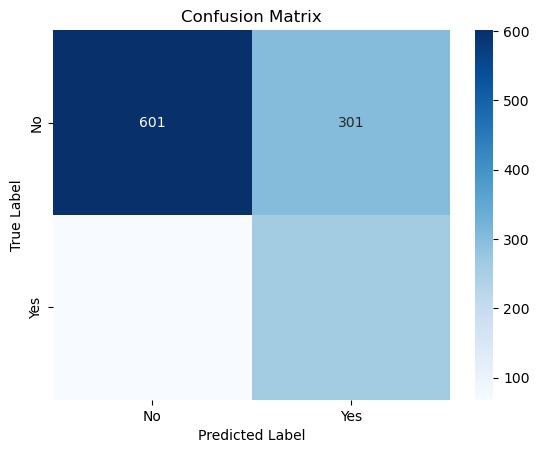

In [34]:
# Define class labels
class_labels = ['No', 'Yes']

# Create a confusion matrix
conf_matrix3 = confusion_matrix(y_test, pred3, labels=class_labels)

# Display the confusion matrix using seaborn heatmap
sb.heatmap(conf_matrix3, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

# Set axis labels and plot title
mpp.xlabel('Predicted Label')
mpp.ylabel('True Label')
mpp.title('Confusion Matrix')

# Show the plot
mpp.show()


In [40]:
conf_matrix3 = confusion_matrix(y_test, pred3, labels=class_labels)
conf_matrix3

array([[601, 301],
       [ 68, 261]], dtype=int64)

**KEY INSIGHTS**

**Recall Score**:

- The K-Nearest Neighbors (KNN) model with Random Over-sampling demonstrates a commendable recall score of approximately 79% for the positive class ('Yes' churn). This emphasizes its effectiveness in identifying customers likely to churn, aligning with our primary goal.

**Trade-off Analysis**:

- The model strikes a balance between precision and recall, crucial for our task where correctly identifying churn cases is pivotal. While precision indicates the accuracy of positive predictions, recall ensures the model captures a significant portion of actual churn instances.

**Impact on Churning Customers**:

- With a nuanced trade-off, the KNN model might exhibit higher accuracy but lower recall compared to other models. This trade-off influences the model's ability to accurately predict customers at risk of churning. The emphasis on recall is paramount, as it directly impacts the identification of potential churn cases.

In conclusion, the KNN model with Random Over-sampling enriches our ensemble with diverse predictive capabilities, offering valuable insights into customer churn prediction. The model's performance highlights its ability to contribute to the identification of customers at risk, contributing to informed decision-making.

## ***SUMMARY & RECOMMENDATION*** ###

Our exploration into predicting customer churn, employing Gaussian Naive Bayes models with Random Over-sampling and SMOTE, along with the K-Nearest Neighbors model with Random Over-sampling, has provided nuanced insights into their performances.

**Gaussian Naive Bayes Models:**
- **Random Over-sampling and SMOTE:** Both techniques yielded comparable results, underscoring the robustness of the Gaussian Naive Bayes model.
- **Overall Accuracy:** Despite a moderate overall accuracy of 68%, the models showcased a crucial strength—accurately identifying potential churn cases. This is evident in the impressive 90% recall for the positive class ('Yes' churn), highlighting the model's proficiency in capturing actual churn instances.

**K-Nearest Neighbors Model:**
- **Random Over-sampling:** Demonstrated a distinct advantage with the second-highest recall of 79% for the positive class.
- **Balance between Precision and Recall:** Achieved a balanced trade-off, resulting in an accuracy of 70%, positioning this model as a promising choice for churn prediction.

**Model Comparison:**
- While models exhibited similar accuracy, variations in precision and recall emphasize the importance of aligning the chosen model with specific business objectives.
- Iterative hyperparameter tuning and exploration of different sampling techniques provided a nuanced understanding of model behavior.

**Recommendations:**
- **Preferred Model:** Considering the trade-offs between precision and recall and the significance of correctly identifying potential churn cases, the K-Nearest Neighbors model with Random Over-sampling emerges as our preferred choice. It achieves a commendable balance in capturing actual churn instances without compromising overall accuracy.
- **Business Alignment:** In the context of our analysis, our primary focus was on the detection of churning customers, a critical aspect for businesses aiming to proactively address customer attrition. Given this emphasis, we heavily leaned towards optimizing recall—a metric that gauges the model's effectiveness in capturing as many true positive instances (actual churning customers) as possible. The reason for prioritizing recall is rooted in the consequences associated with misclassifying churning customers. False negatives (failing to identify actual churn cases) could lead to missed opportunities for intervention and retention strategies, potentially resulting in customer loss. In this scenario, the cost of a false negative outweighs the cost of a false positive.

    It's crucial to acknowledge that the preferred model and emphasis on recall might vary based on the specific vision and goals of the business. For instance, in situations where false positives (incorrectly identifying non-churning customers as churning) have significant ramifications, a different model emphasizing precision might be preferred.

**Insights from Metrics:**
- **Precision and Recall:** These metrics showcase the model's ability to correctly classify positive instances, emphasizing the balance necessary for effective churn prediction.
- **Confusion Matrix:** Detailed examination provides insights into the distribution of true positives, true negatives, false positives, and false negatives, offering a nuanced understanding of model performance.

**Note on Hyperparameter Tuning:**
- The provided hyperparameter tuning code illustrates a meticulous approach, particularly effective with limited data. For larger datasets, alternative methods like Bayesian optimization or random search may be considered for efficient exploration.

**Conclusion:**
Our journey underscores the iterative nature of model evaluation and selection. The chosen model should not only align with statistical metrics but also serve overarching business goals, making it a valuable asset in identifying and mitigating customer churn.